In [1]:
import pandas as pd

data =  pd.read_csv("/kaggle/input/playground-series-s4e7/train.csv")
data.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [2]:
# Data Preprocessing

data['Vehicle_Age'] = data['Vehicle_Age'].replace({'< 1 Year':3,'1-2 Year':1,'> 2 Years':2})
data['Gender'] = data['Gender'].replace({'Male':0, 'Female':1})
data['Vehicle_Damage'] = data['Vehicle_Damage'].replace({'Yes':1, 'No':0})
data['Previously_Insured'] = data['Previously_Insured'].replace({'Yes':1, 'No':0})
data = data.drop('id',axis=1)
data = data.dropna()
data.head(2)

/tmp/ipykernel_18/2607544452.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Vehicle_Age'] = data['Vehicle_Age'].replace({'< 1 Year':3,'1-2 Year':1,'> 2 Years':2})
/tmp/ipykernel_18/2607544452.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'] = data['Gender'].replace({'Male':0, 'Female':1})
/tmp/ipykernel_18/2607544452.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,21,1,35.0,0,1,1,65101.0,124.0,187,0
1,0,43,1,28.0,0,2,1,58911.0,26.0,288,1


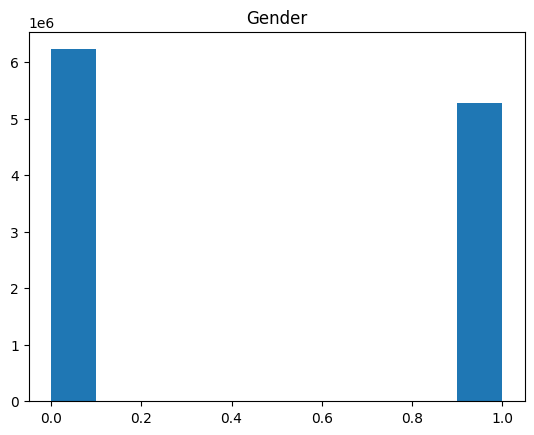

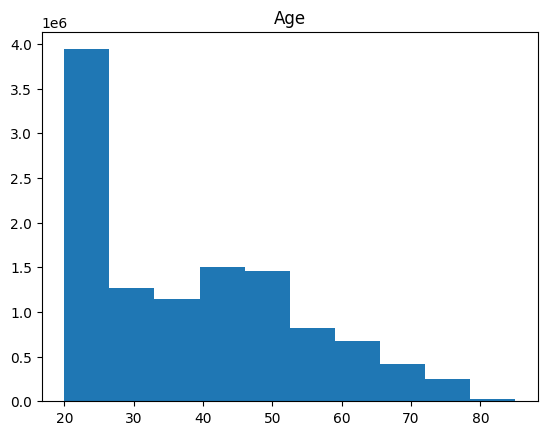

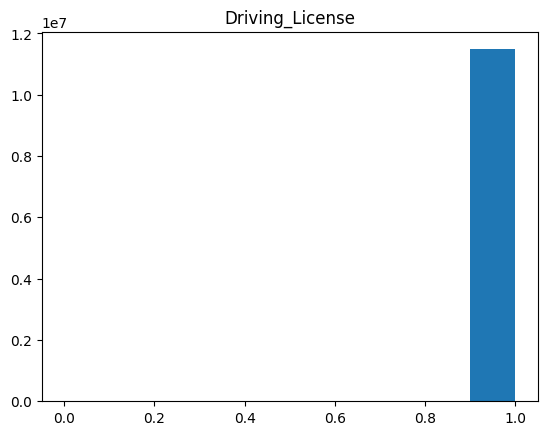

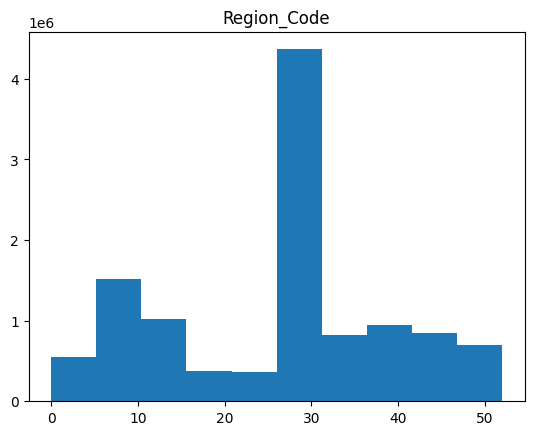

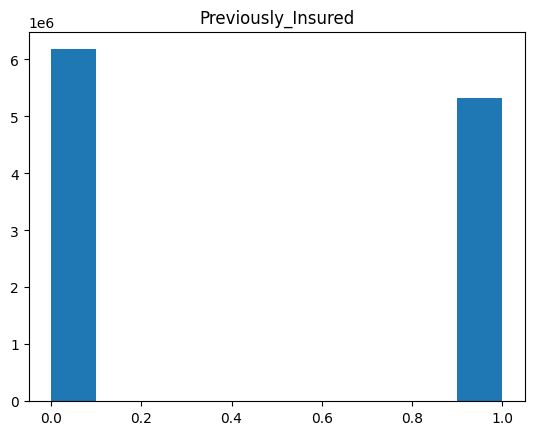

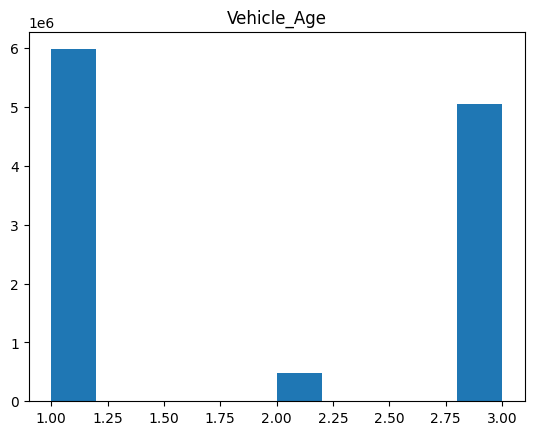

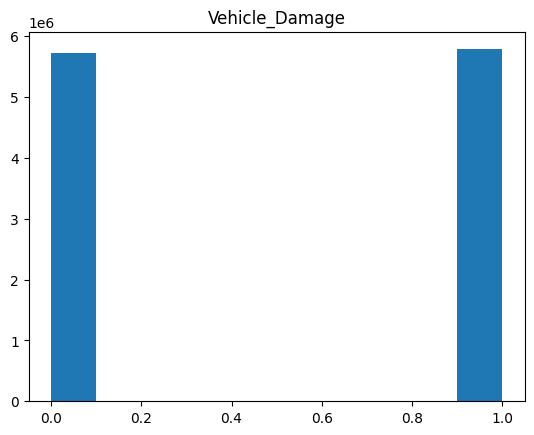

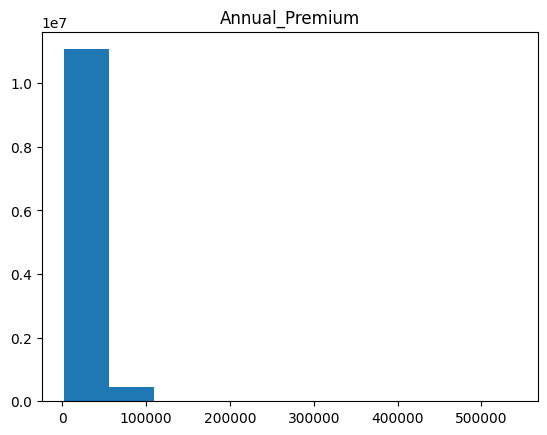

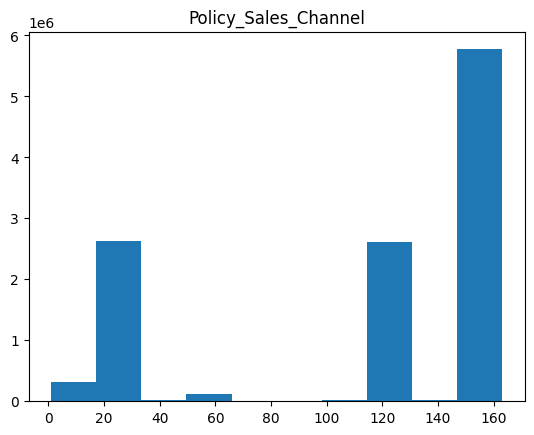

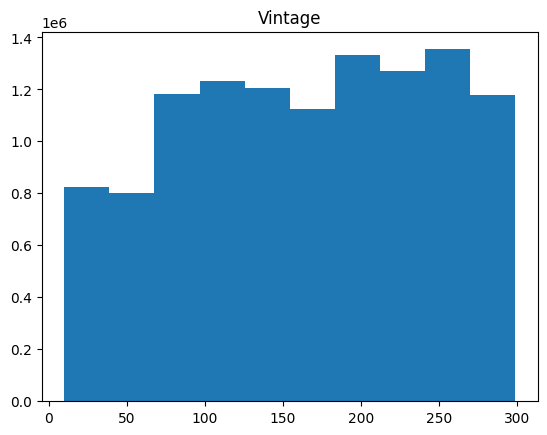

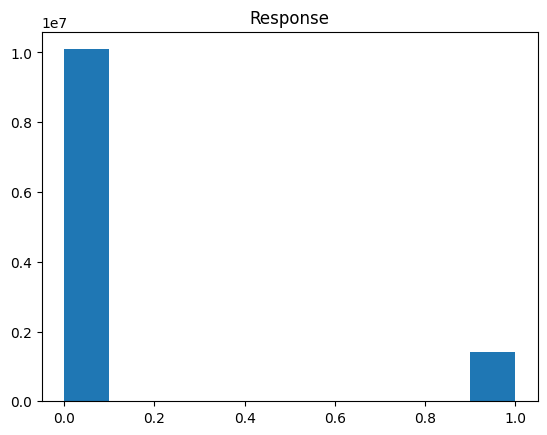

In [3]:
# Look for columns not normally distributed
import matplotlib.pyplot as plt

for column in data.columns:
    plt.hist(data[column])
    plt.title(column)
    plt.show()

In [4]:
# convert skewed data into linear distribution for better results

import numpy as np

data['Age'] = np.log(data['Age'] + 1)  # Adding 1 to avoid log(0)
data['Annual_Premium'] = np.log(data['Annual_Premium'] + 1)  
data['Policy_Sales_Channel'] = np.log(data['Policy_Sales_Channel'] + 1) 

In [5]:
# Split the data into train and test

from sklearn.model_selection import train_test_split
X = data.drop('Response',axis=1)
y = data['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Train and test the data on different Prediction models**


In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss, roc_auc_score, brier_score_loss

nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

y_pred = nb_model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)
logloss = log_loss(y_test, y_pred)
print("Log Loss:", logloss)


ROC AUC Score: 0.8239805918552408
Log Loss: 1.319731052493022


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, log_loss

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

y_pred = model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)
logloss = log_loss(y_test, y_pred)
print("Log Loss:", logloss)

ROC AUC Score: 0.8301237230679189
Log Loss: 0.2759701075494595


In [8]:
test = pd.read_csv('/kaggle/input/playground-series-s4e7/test.csv')

test.dropna(inplace = True)
id = test['id']
test.drop(['id'], axis = 1, inplace = True)

test.head(2)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123


In [9]:
# preprocessing like training data

test['Vehicle_Age'] = test['Vehicle_Age'].replace({'< 1 Year':3,'1-2 Year':1,'> 2 Years':2})
test['Gender'] = test['Gender'].replace({'Male':0, 'Female':1})
test['Vehicle_Damage'] = test['Vehicle_Damage'].replace({'Yes':1, 'No':0})
test['Previously_Insured'] = test['Previously_Insured'].replace({'Yes':1, 'No':0})

test['Age'] = np.log(test['Age'] + 1)  # Adding 1 to avoid log(0)
test['Annual_Premium'] = np.log(test['Annual_Premium'] + 1)  
test['Policy_Sales_Channel'] = np.log(test['Policy_Sales_Channel'] + 1)  



/tmp/ipykernel_18/2425224908.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['Vehicle_Age'] = test['Vehicle_Age'].replace({'< 1 Year':3,'1-2 Year':1,'> 2 Years':2})
/tmp/ipykernel_18/2425224908.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['Gender'] = test['Gender'].replace({'Male':0, 'Female':1})
/tmp/ipykernel_18/2425224908.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`

In [10]:
# Train the model again on entire data for better results

model = LogisticRegression(max_iter=1000)

model.fit(X, y)

LogisticRegression(max_iter=1000)

In [11]:
# Predict and save the data into submission file

Response = model.predict_proba(test)[:, 1]
predictions = pd.DataFrame({'id': id, 'Response': Response})
predictions.to_csv('Submission.csv', index=False)  # Save to a CSV file